[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kaushikreddym/climdata/blob/main/docs/examples/datasets/cmip_w5e5_example.ipynb)

In [ ]:
# Uncomment to install climdata in Google Colab or other environments
# !pip install climdata

## Example 1: Basic Usage - Point Extraction

Extract climate projection data for a specific location.

In [1]:
from climdata.utils.config import load_config
from climdata.datasets.CMIP_W5E5 import CMIPW5E5
from climdata import ClimData

# Configure for Berlin, Germany
overrides = [
    "dataset=cmip_w5e5",                  # Select CMIP-W5E5 dataset
    "lat=52.52",                          # Berlin latitude
    "lon=13.40",                          # Berlin longitude
    "experiment_id=ssp585",               # Climate scenario (ssp585 = high emissions)
    "source_id=gfdl-esm4",                # CMIP6 model
    "time_range.start_date=2010-01-01",   # Future period
    "time_range.end_date=2010-12-31",
    "variables=[tas,tasmin,tasmax,pr]",   # Temperature and precipitation
    "data_dir=/beegfs/muduchuru/data",                    # Local directory for downloaded files
]

extractor = ClimData(overrides=overrides)

# Initialize CMIP-W5E5 dataset
cmip_w5e5 = CMIPW5E5(extractor.cfg)

# Fetch data from ISIMIP repository
cmip_w5e5.fetch()

# Load into xarray
cmip_w5e5.load()

# Extract for point location
cmip_w5e5.extract(point=(extractor.cfg.lon, extractor.cfg.lat))

ValueError: ❌ Time range mismatch for experiment 'ssp585'!
   Requested: 2010-2010
   Valid period for SSP scenario (ssp585): 2015-2100
   
   Hint: Use 'historical' for years 1850-2014, and SSP scenarios (ssp126, ssp370, ssp585) for 2015-2100.

In [2]:
# View the dataset
cmip_w5e5.ds

<xarray.Dataset> Size: 9kB
Dimensions:  (time: 365)
Coordinates:
    lon      float64 8B 13.25
    lat      float64 8B 52.75
  * time     (time) datetime64[ns] 3kB 2050-01-01 2050-01-02 ... 2050-12-31
Data variables:
    tas      (time) float32 1kB ...
    tasmin   (time) float32 1kB ...
    tasmax   (time) float32 1kB ...
    pr       (time) float32 1kB ...
Attributes:
    institution:    Potsdam Institute for Climate Impact Research (PIK)
    contact:        ISIMIP cross-sectoral science team <info@isimip.org> <htt...
    references:     Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> a...
    title:          ISIMIP3b bias-adjusted climate input data
    project:        Inter-Sectoral Impact Model Intercomparison Project phase...
    summary:        CMIP6 daily output data bias-adjusted and statistically d...
    source:         CMIP6 gfdl-esm4 via ISIMIP
    dataset:        CMIP6-W5E5
    experiment_id:  ssp585
    source_id:      gfdl-esm4
    member_id:      r1i1p1f1
    description:    CMIP6 ssp585 scenario from gfdl-esm4 in W5E5 format

## Example 2: Explore Available Models and Scenarios

Discover what CMIP6 experiments and models are available.

In [4]:
from climdata.datasets.CMIP_W5E5 import CMIPW5E5
from climdata.utils.config import load_config

cmip_w5e5 = CMIPW5E5(extractor.cfg)

# Get available experiment IDs
experiments = cmip_w5e5.get_experiment_ids()
print("Available CMIP6 Experiments:")
for exp in experiments:
    print(f"  - {exp}")

🔍 Fetching available experiment IDs from ISIMIP...
✅ Found 1 experiment IDs: ['historical']
Available CMIP6 Experiments:
  - historical


In [5]:
# Get available models for a specific experiment
models = cmip_w5e5.get_source_ids(experiment_id='ssp585')
print("\nAvailable Models for SSP5-8.5:")
for model in models:
    print(f"  - {model}")

🔍 Fetching available source IDs for experiment 'ssp585'...
✅ Found 5 source IDs: ['gfdl-esm4', 'ipsl-cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll']

Available Models for SSP5-8.5:
  - gfdl-esm4
  - ipsl-cm6a-lr
  - mpi-esm1-2-hr
  - mri-esm2-0
  - ukesm1-0-ll


## Example 3: Compare Multiple Scenarios

Compare low and high emission scenarios for the same location.

🔍 Searching for CMIP6 datasets in ISIMIP repository...
   Model: gfdl-esm4, Experiment: ssp126

📥 Fetching tasmin...
✅ Found dataset: gfdl-esm4_r1i1p1f1_w5e5_ssp126_tasmin_global_daily
  ✓ Already exists: gfdl-esm4_r1i1p1f1_w5e5_ssp126_tasmin_global_daily_2041_2050.nc

✅ Downloaded 1 files
📂 Loading 1 CMIP6 files...
  Loading tasmin from 1 file(s)...
✅ Loaded dataset with 1 variables
🔍 Searching for CMIP6 datasets in ISIMIP repository...
   Model: gfdl-esm4, Experiment: ssp585

📥 Fetching tasmin...
✅ Found dataset: gfdl-esm4_r1i1p1f1_w5e5_ssp585_tasmin_global_daily
  ✓ Already exists: gfdl-esm4_r1i1p1f1_w5e5_ssp585_tasmin_global_daily_2041_2050.nc

✅ Downloaded 1 files
📂 Loading 1 CMIP6 files...
  Loading tasmin from 1 file(s)...
✅ Loaded dataset with 1 variables


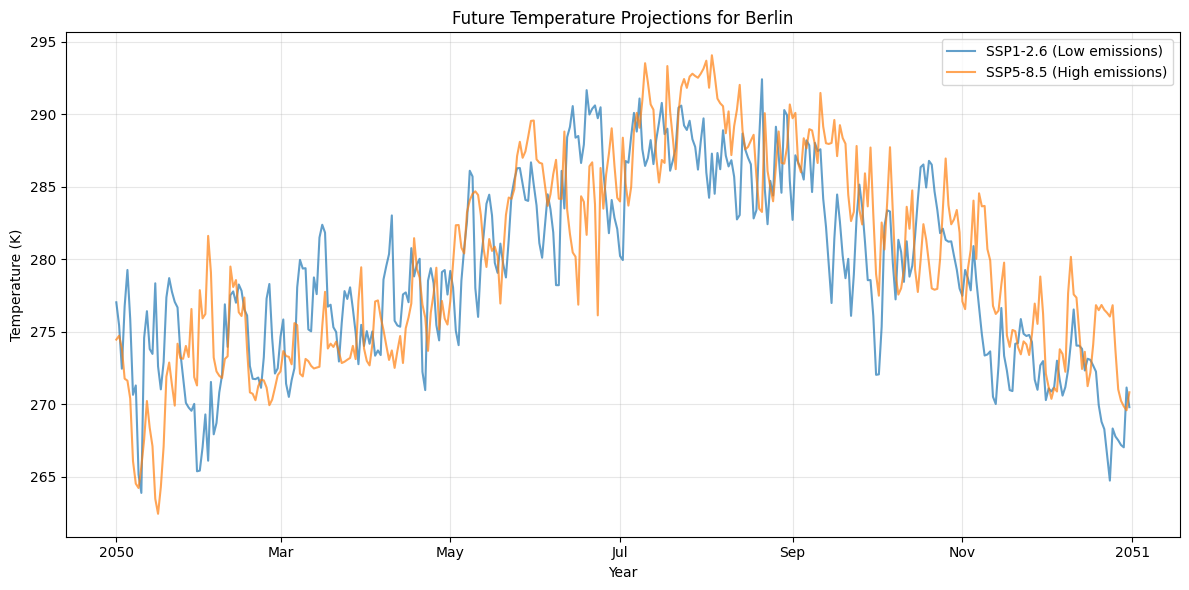

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
from climdata import ClimData
from climdata.datasets.CMIP_W5E5 import CMIPW5E5
# Function to load data for a scenario
def load_scenario(scenario, model='gfdl-esm4'):
    overrides = [
        "dataset=cmip_w5e5",
        "lat=52.52",
        "lon=13.40",
        f"experiment_id={scenario}",
        f"source_id={model}",
        "time_range.start_date=2050-01-01",
        "time_range.end_date=2050-12-31",
        "variables=[tasmin]",
        "data_dir=/beegfs/muduchuru/data",
    ]
    extractor = ClimData(overrides=overrides)
    cmip = CMIPW5E5(extractor.cfg)
    cmip.fetch()
    cmip.load()
    cmip.extract(point=(extractor.cfg.lon, extractor.cfg.lat))
    return cmip.ds

# Load low and high emission scenarios
ds_low = load_scenario('ssp126')  # Low emissions
ds_high = load_scenario('ssp585') # High emissions

# Plot comparison
plt.figure(figsize=(12, 6))
ds_low['tasmin'].plot(label='SSP1-2.6 (Low emissions)', alpha=0.7)
ds_high['tasmin'].plot(label='SSP5-8.5 (High emissions)', alpha=0.7)
plt.title('Future Temperature Projections for Berlin')
plt.ylabel('Temperature (K)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Example 4: Regional Extraction with Bounding Box

Extract data for a region instead of a single point.

In [1]:
from climdata.datasets.CMIP_W5E5 import CMIPW5E5
from climdata import ClimData

# Configure for Central Europe region
overrides = [
    "dataset=cmip_w5e5",
    "experiment_id=ssp126",                # Middle-of-the-road scenario
    "source_id=gfdl-esm4",               # UK Earth System Model
    "time_range.start_date=2050-01-01",
    "time_range.end_date=2050-12-31",
    "variables=[tas,pr]",
    "data_dir=/beegfs/muduchuru/data",
]

extractor = ClimData(overrides=overrides)
cmip_w5e5 = CMIPW5E5(extractor.cfg)

# Fetch and load
cmip_w5e5.fetch()
cmip_w5e5.load()

# Extract for Central Europe bounding box
box = {
    'lon_min': 5.0,   # Western boundary
    'lon_max': 15.0,  # Eastern boundary
    'lat_min': 47.0,  # Southern boundary
    'lat_max': 55.0   # Northern boundary
}
cmip_w5e5.extract(box=box)

# View spatial data
cmip_w5e5.ds

🔍 Searching for CMIP6 datasets in ISIMIP repository...
   Model: gfdl-esm4, Experiment: ssp126

📥 Fetching tas...
✅ Found dataset: gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily
  ✓ Already exists: gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2041_2050.nc

📥 Fetching pr...
✅ Found dataset: gfdl-esm4_r1i1p1f1_w5e5_ssp126_pr_global_daily
  ✓ Already exists: gfdl-esm4_r1i1p1f1_w5e5_ssp126_pr_global_daily_2041_2050.nc

✅ Downloaded 2 files
📂 Loading 2 CMIP6 files...
  Loading tas from 1 file(s)...
  Loading pr from 1 file(s)...
✅ Loaded dataset with 2 variables


<xarray.Dataset> Size: 938kB
Dimensions:  (lat: 16, time: 365, lon: 20)
Coordinates:
  * lat      (lat) float64 128B 47.25 47.75 48.25 48.75 ... 53.75 54.25 54.75
  * time     (time) datetime64[ns] 3kB 2050-01-01 2050-01-02 ... 2050-12-31
  * lon      (lon) float64 160B 5.25 5.75 6.25 6.75 ... 13.25 13.75 14.25 14.75
Data variables:
    tas      (time, lat, lon) float32 467kB ...
    pr       (time, lat, lon) float32 467kB ...
Attributes:
    institution:    Potsdam Institute for Climate Impact Research (PIK)
    contact:        ISIMIP cross-sectoral science team <info@isimip.org> <htt...
    references:     Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> a...
    title:          ISIMIP3b bias-adjusted climate input data
    project:        Inter-Sectoral Impact Model Intercomparison Project phase...
    summary:        CMIP6 daily output data bias-adjusted and statistically d...
    source:         CMIP6 gfdl-esm4 via ISIMIP
    dataset:        CMIP6-W5E5
    experiment_id:  ssp126
    source_id:      gfdl-esm4
    member_id:      r1i1p1f1
    description:    CMIP6 ssp126 scenario from gfdl-esm4 in W5E5 format

In [9]:
# Plot spatial map for a specific day
import matplotlib.pyplot as plt
import hvplot.xarray
# Select first day
cmip_w5e5.ds['tas'].isel(time=0).hvplot(figsize=(10, 8),coastline=True,geo=True)

:Overlay
   .Image.I     :Image   [lon,lat]   (Near-Surface Air Temperature)
   .Coastline.I :Feature   [Longitude,Latitude]

## Example 5: Save Data to File

Export extracted data to NetCDF or CSV format.

In [ ]:
from climdata.datasets.CMIP_W5E5 import CMIPW5E5
from climdata import ClimData

# Configure and extract
overrides = [
    "dataset=cmip_w5e5",
    "lat=52.52",
    "lon=13.40",
    "experiment_id=ssp370",
    "source_id=mpi-esm1-2-hr",
    "time_range.start_date=2080-01-01",
    "time_range.end_date=2080-12-31",
    "variables=[tas,pr,rsds]",
    "data_dir=./data",
]

extractor = ClimData(overrides=overrides)
cmip_w5e5 = CMIPW5E5(extractor.cfg)
cmip_w5e5.fetch()
cmip_w5e5.load()
cmip_w5e5.extract(point=(extractor.cfg.lon, extractor.cfg.lat))

# Save as NetCDF
cmip_w5e5.save_netcdf('berlin_ssp370_2080.nc')

# Save as CSV
cmip_w5e5.save_csv('berlin_ssp370_2080.csv')

print("✅ Data saved successfully!")

## Example 6: Using ClimateExtractor Workflow

Use the high-level `ClimateExtractor` workflow for end-to-end processing.

In [ ]:
from climdata.utils.wrapper_workflow import ClimateExtractor

# Configure with overrides
overrides = [
    "dataset=cmip_w5e5",
    "lat=12.89",
    "lon=24.25",
    "experiment_id=ssp585",
    "source_id=gfdl-esm4",
    "time_range.start_date=2050-01-01",
    "time_range.end_date=2050-12-31",
    "variables=[tasmin,tasmax,pr]",
    "data_dir=./data",
]

# Initialize extractor
extractor = ClimateExtractor(overrides=overrides)

# Extract data
ds = extractor.extract()

# Convert to DataFrame
df = extractor.to_dataframe()

# Save results
result = extractor.save(format='csv')

print(f"Data extracted and saved to: {result.filename}")
df.head()

## Example 7: Calculate Climate Indices

Compute extreme indices like frost days or heat waves from CMIP-W5E5 data.

In [ ]:
from climdata.utils.wrapper_workflow import ClimateExtractor

# Configure with climate index
overrides = [
    "dataset=cmip_w5e5",
    "lat=52.52",
    "lon=13.40",
    "experiment_id=ssp585",
    "source_id=gfdl-esm4",
    "time_range.start_date=2050-01-01",
    "time_range.end_date=2079-12-31",  # 30 years for climate indices
    "variables=[tasmin,tasmax,pr]",
    "index=tn10p",  # Cold nights (10th percentile of minimum temperature)
    "data_dir=./data",
]

extractor = ClimateExtractor(overrides=overrides)

# Extract base data
ds = extractor.extract()

# Calculate index
index_ds = extractor.calc_index()

# View results
print("Climate index calculated:")
index_ds

## Key Features

### Scenarios Available
- **historical**: Historical period (typically 1850-2014)
- **ssp126**: Low emissions (sustainability pathway)
- **ssp245**: Middle-of-the-road (moderate emissions)
- **ssp370**: Medium-high emissions
- **ssp585**: High emissions (fossil-fueled development)

### Models Available in ISIMIP3b
- **gfdl-esm4**: NOAA Geophysical Fluid Dynamics Laboratory
- **ipsl-cm6a-lr**: Institut Pierre-Simon Laplace
- **mpi-esm1-2-hr**: Max Planck Institute for Meteorology
- **mri-esm2-0**: Meteorological Research Institute
- **ukesm1-0-ll**: UK Earth System Modeling

### Variables
Standard CMIP6 variables are available:
- **tas**: Near-surface air temperature (K)
- **tasmin**: Daily minimum temperature (K)
- **tasmax**: Daily maximum temperature (K)
- **pr**: Precipitation (kg m⁻² s⁻¹)
- **rsds**: Surface downwelling shortwave radiation (W m⁻²)
- **hurs**: Near-surface relative humidity (%)
- **sfcWind**: Near-surface wind speed (m s⁻¹)
- **ps**: Surface air pressure (Pa)

## Notes

1. **Data Size**: CMIP6 files can be large. Start with short time periods for testing.
2. **ISIMIP Client**: Requires `isimip-client` package for data access.
3. **Resolution**: Data is provided at 0.5° (~55 km) spatial resolution.
4. **Bias Adjustment**: ISIMIP3b data is bias-adjusted to W5E5 observations.
5. **Attribution**: When using this data, cite both CMIP6 and ISIMIP appropriately.

## References

- ISIMIP: https://www.isimip.org/
- CMIP6: https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6
- W5E5: https://doi.org/10.48364/ISIMIP.342217